# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,zrkrwmgseetfegaozv kovx vh,0,0,0,1
1,Comment puis-je me rendre de l'aéroport de CHA...,1,0,0,0
2,4f3;S0`HsL# hL8ydlwlM2cK7=,0,0,0,1
3,"u*]P\UsbAr,CoDnDdr*-GKN(0O",0,0,0,1
4,J'aimerais connaître le chemin pour aller de S...,1,0,0,0
...,...,...,...,...,...
1302960,Il a prétendu être mon ami.,0,0,1,0
1302961,I am planning a trip from saint paul les dax t...,0,1,0,0
1302962,Go from the train station of Loches to Venarey...,0,1,0,0
1302963,Je souhaiterais aller à verneuil sur serre dep...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


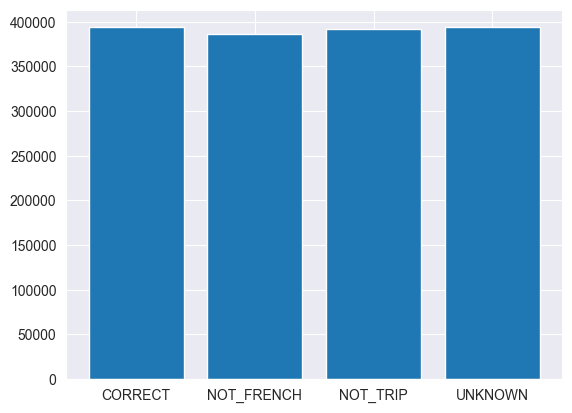

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Lemmatisation (reduction des mots à leur forme canonique) et suppression des stopwords

In [4]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

In [6]:
import re

def lemmatize_text(text: str):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)

In [7]:
dataset['text'] = dataset['text'].apply(lemmatize_text)

In [8]:
dataset[dataset['CORRECT'] == 1]

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
1,comment puis rendre aéroport chalon saone tern...,1,0,0,0
4,aimerais connaître chemin aller saint paul dax...,1,0,0,0
5,hopital clelles hopital narbonne,1,0,0,0
6,a moyen atteindre boën depuis longueville,1,0,0,0
9,indique chemin depuis hopital castres jusqu ho...,1,0,0,0
...,...,...,...,...,...
1302954,cherche déplacer vers libourne depuis hopital ...,1,0,0,0
1302958,comment aller bagnères luchon depuis annecy,1,0,0,0
1302959,a train hopital saint éloy mine morez,1,0,0,0
1302963,souhaiterais aller verneuil serre depuis châte...,1,0,0,0


# Split du dataset en train, test et validation

In [9]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(521185,) (65148,) (65149,)
(521185, 4) (65148, 4) (65149, 4)


In [10]:
X_train.values

array(['souhaite aller delle partant gare mulhouse comment faire',
       'cpbblvfczjogqwwoelkx czrtr', 'réalisez ça veut dire', ...,
       'eq duhj vylo z 8 5r xe u',
       'a moyen atteindre poitier depuis aix provence',
       'trouve moyen transport gare vieil évreux vers paris'],
      dtype=object)

# Exemple d'utilisation de CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<521185x405519 sparse matrix of type '<class 'numpy.int64'>'
	with 3429356 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [12]:
v.get_feature_names_out()[100000:100050]

array(['egf', 'egfakwz', 'egfdrifemrjmpk', 'egffm6', 'egfhc', 'egfk',
       'egfmhznmectjx', 'egfuy', 'egfwotogaehpbt', 'egfxpjbj',
       'egfznpydb', 'egg', 'eggagkrtkbre', 'eggdbt', 'eggh', 'eggi',
       'eggjmr', 'eggjrfsuoqrxd', 'eggk', 'eggoads', 'eggplant',
       'eggpxtf', 'eggq', 'eggq6', 'eggrvkuja', 'eggwjpu', 'eggxb',
       'eggyrqvj', 'eggyw0jg', 'egh', 'egh5', 'eghcvt', 'eghg',
       'eghipefzerzbwdpc', 'eghonq', 'eghor', 'eghqpe', 'eghv', 'eghwph',
       'eghzppqd', 'egi', 'egi4j530bu', 'egi6f', 'egidio', 'egiebm',
       'egikfmwufdjwonz', 'egim', 'egipto', 'egiqj', 'egiqmhagqymdfp'],
      dtype=object)

In [13]:
# Number of identified features
v.get_feature_names_out().shape

(405519,)

In [14]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x78538 sparse matrix of type '<class 'numpy.int64'>'
	with 3550172 stored elements in Compressed Sparse Row format>

In [15]:
# Number of identified features
v.get_feature_names_out().shape

(78538,)

In [16]:
v.get_feature_names_out()[30000:30050]

array(['giriamolo', 'girl', 'girlfriend', 'girly', 'giro', 'girolamo',
       'girons', 'gironzola', 'giscard', 'gisel', 'gisela', 'giselda',
       'gisele', 'giselle', 'gisette', 'gishlaine', 'gislain', 'gisleine',
       'gislhain', 'gismond', 'gismonde', 'gisèle', 'gita', 'gitane',
       'gitano', 'gitarre', 'gitarrist', 'giudica', 'giudicare',
       'giudice', 'giudici', 'giudizi', 'giudizio', 'giugno', 'giulia',
       'giulian', 'giuliane', 'giulianna', 'giuliano', 'giulietta',
       'giulio', 'giullia', 'giullian', 'giulya', 'giulyan', 'giungere',
       'giunto', 'giuria', 'giuridica', 'giuridici'], dtype=object)

In [17]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x1832 sparse matrix of type '<class 'numpy.int64'>'
	with 3268128 stored elements in Compressed Sparse Row format>

In [18]:
# Number of identified features
v.get_feature_names_out().shape

(1832,)

In [19]:
v.get_feature_names_out()[::50]

array(['11', 'alone', 'arrivée', 'barenton', 'bist', 'bussang', 'cercy',
       'chose', 'could', 'detto', 'down', 'erstein', 'firminy', 'gerne',
       'halte', 'ich', 'junien', 'leben', 'louis', 'many', 'mezieres',
       'montpellier', 'narboz', 'objat', 'parler', 'planifier', 'prévue',
       'rencontrer', 'réalisable', 'sehr', 'speak', 'tempo', 'took', 'up',
       'vic', 'well', 'yo'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [21]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.90      1.00      0.94     19671
  NOT_FRENCH       0.98      1.00      0.99     19303
    NOT_TRIP       0.97      0.88      0.93     19687
     UNKNOWN       1.00      0.80      0.89     19687

   micro avg       0.96      0.92      0.94     78348
   macro avg       0.96      0.92      0.94     78348
weighted avg       0.96      0.92      0.94     78348
 samples avg       0.90      0.91      0.90     78348


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

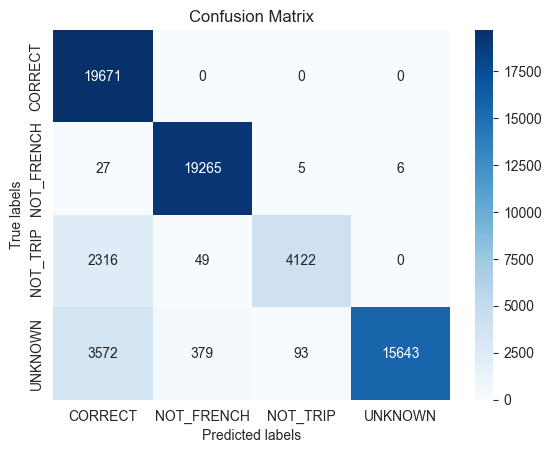

In [23]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

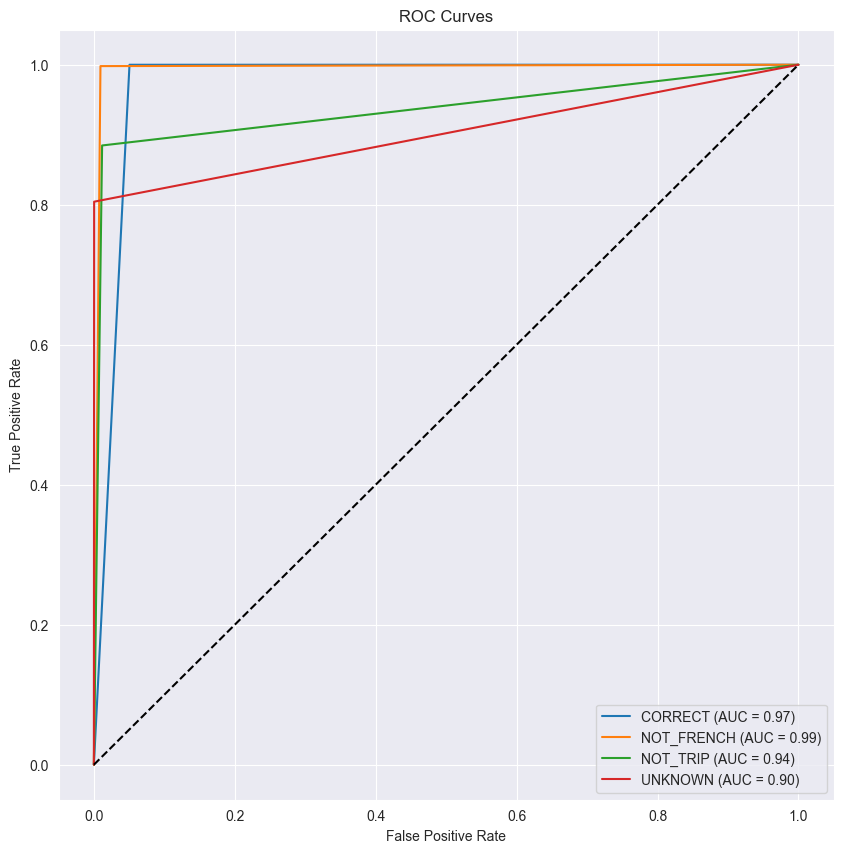

In [24]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [25]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.6%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.9%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 99.3%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 3.2%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 99.9%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.5%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 76.3%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 70.1%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 76.7%
 - NOT_FRENCH => 10.5%
 - NOT_TRIP => 6.1%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Étien

# La performance du modèle semble équivalent à la version avec seulement les stops words. Cependant, le modèle semble plus serein sur les pourcentages de confiance pour chaque label (beaucoup plus de 100% pour le label à prédire) et de 0% pour les autres labels).

In [26]:
# print few predictions from test dataset where classifier failed
for i in range(len(y_test)):
    if (y_test.values[i] != y_pred[i]).any():
        print(X_test.values[i])
        print("True labels:", [id2label[i] for i, label in enumerate(y_test.values[i]) if label == 1])
        print("Predicted labels:", [id2label[i] for i, label in enumerate(y_pred[i]) if label == 1])
        print()

train planifier départ gare digoin
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

peux savoir quoi joues là
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

i looking for a way to depart from the airport of lutterbach
True labels: ['NOT_FRENCH', 'NOT_TRIP']
Predicted labels: ['NOT_FRENCH']

fuvqy nzuj5 zu ef1iyj e
True labels: ['UNKNOWN']
Predicted labels: ['NOT_FRENCH', 'NOT_TRIP']

fxbopcv uepxcmlp wivomknes
True labels: ['UNKNOWN']
Predicted labels: []

comment partir tour pin
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comment rendre rolleville
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comment aller gare auxerre
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comment partir chantonnay
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

z jayml vhp5y _ydy8
True labels: ['UNKNOWN']
Predicted labels: []

promit rencontrer café
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT', 'NOT_TRIP']

comment partir gare ettendorf p